# Problem Statement

For predicting, if a user will have Sarcopenia or not, we need to build 3 models.

- Model 1
    - Determine the probability that the patient has Sarcopenia based on variables available when the patient is home, such as age, weight, height, exercise, Hyper tension, DM, Education, Smoking etc. Such values can be obtained without the 
patient reporting physically to a clinic. 
    - At the end of Model1, diagnose patients with very high probability of developing Sarc as positive and very low robability of Sarc as negative. 
    - The remaining patients need further testing, so send them to the send model.
    
- Model 2
    - Predict the Sarcopenia probability including CST and GSP. To measure CST, “Chair Stand Test”, a physician times a patient when she sits and stands up on a chair five times. To measure GDP, “Gait speed test”, a physician times a patient when she walks a certain distance. We are provided with these two features in the dataset. In the second model, in addition to the variables we used in the first model, we will include CST and GDP.

- Model 3 
    - Predict the Sarcopenia including ‘GRS’, Grip Strength Test. A physician measures the grp strength of a patient using a gyro hand grip. We will include GRS into our model with all the variables from Model2.
    
The remaining patients after Model 3 will go through ultrasound process to measure their muscle thickness, which will increase the certainty for diagnosing whether they have Sarcopenia. Our goal is, making the diagnosis as much as possible and reduce number of patients going through extra tests.

### What is Gradient Boosting?

Gradient Boosting is a popular boosting algorithm. In gradient boosting, each predictor corrects its predecessor’s error,  where each predictor is trained using the residual errors of predecessor as labels. We use Gradient to calculate derivatives to minimize residual errors. The Gradient Boosting algorithm works for both classification and regression analysis.

How Gradient Boosting Works?
The working of gradient boosting revolves around the three main elements. These are as follows:

- A loss function

The basic objective here is to optimize the loss function. The loss function changes with different types of problems. One can easily define their own standard loss function, but it should be differentiable.  One of the best things about gradient boosting is that with each framework a fresh boosting algorithm is not required for every loss function in question.

- A weak learner

Weak learners are for the purpose of making predictions. A decision tree is basically a weak learner. Specific regression trees are used for the real output values that are used for splits. We can correct the reminders in the prediction models. Purity scores such as Gini selects the best split-points, which further construct the trees.

When it comes to another boosting technique called Adaboost, one uses single-spilled decision trees. In case of a higher number of levels (say 5 to 10), we can use larger trees. It is better to constrain or restrict the weak learners in using the number of leaf nodes or the number of layers or number of splits, or even the number of layers.

- An additive model

There are no modifications to pre-existing trees in the model, but there is the addition of a greater number of - trees at a time.

At the time of adding the trees, a gradient descent procedure minimizes the losses. It minimizes the set number of parameters. In order to decrease the error, there is an updation of the weights only after calculating the error.

The sub-models of weak learners take the place of parameters. After computation of the loss, we must add a tree to the model in a way that reduce losses so that we can do the gradient descent procedure. In the end, we can add the output to the sequence of trees.

### Load the libraries

In [93]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### Load the data

In [94]:
import copy
df_X_train=pd.read_csv("X_train.csv",index_col=0)
df_X_train_copy=copy.deepcopy(df_X_train)
df_X_train_copy.shape

(1042, 37)

In [95]:
df_X_test=pd.read_csv("X_test.csv",index_col=0)
df_X_test_copy=copy.deepcopy(df_X_test)
df_X_test_copy.shape

(261, 37)

In [96]:
df_y_train=pd.read_csv("y_train.csv")
df_y_train.drop(['Unnamed: 0'],axis=1,inplace=True)
df_y_train_copy = copy.deepcopy(df_y_train)
df_y_train_copy.shape

(1042, 1)

In [97]:
df_y_test=pd.read_csv("y_test.csv")
df_y_test.drop(['Unnamed: 0'],axis=1,inplace=True)
df_y_test_copy = copy.deepcopy(df_y_test)
df_y_test_copy.shape

(261, 1)

### Build the model 1 based on variables available when the patient is home

In [98]:
#all columns avaiable when patient is at home
cols =  ['Education_new','Occupation_new','Working Status_new', 'Smoking (packet/year)_new', 'Age', 'DM ','HT duration_new',
'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new','Hip_new', 'Smoking_new', 'DM duration_new','Gender_M', '  Alcohol_REGULAR',
'  Alcohol_SOCIAL','Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK']
cols

['Education_new',
 'Occupation_new',
 'Working Status_new',
 'Smoking (packet/year)_new',
 'Age',
 'DM ',
 'HT duration_new',
 'MMSE_new',
 'Weight_new',
 'Height_new',
 'Waist_new',
 'Hip_new',
 'Smoking_new',
 'DM duration_new',
 'Gender_M',
 '  Alcohol_REGULAR',
 '  Alcohol_SOCIAL',
 'Exercise_new_1-2/WEEK',
 'Exercise_new_3-4/WEEK']

In [99]:
X_train= df_X_train_copy[cols]
X_train.shape

(1042, 19)

In [100]:
X_test= df_X_test_copy[cols]
X_test.shape

(261, 19)

In [101]:
y_train =df_y_train_copy
y_train.shape

(1042, 1)

In [102]:
y_test =df_y_test_copy
y_test.shape

(261, 1)

##### Create the model

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

gb1 = GradientBoostingClassifier(
                                loss='log_loss',#loss function to be optimized
                                learning_rate=0.1,#shrinks the contribution of each tree by `learning_rate`
                                n_estimators=100,#number of boosting stages to perform
                                subsample=1.0,#fraction of samples to be used for fitting the individual base learners.
                                random_state=100,
                                max_features=5#number of features to consider when looking for the best split 
                               )


gb1


GradientBoostingClassifier(max_features=5, random_state=100)

##### Fit or train the model

In [104]:
gb1.fit(X_train,y_train.values.ravel())

GradientBoostingClassifier(max_features=5, random_state=100)

##### Make predictions on test data

In [105]:
y_pred_gb1 = gb1.predict(X_test)
y_pred_gb1

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [106]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred_gb1, y_test)
acc

0.8045977011494253

In [107]:
X_train_proba = gb1.predict_proba(X_train)
X_train_proba[:,:]

array([[0.96979144, 0.03020856],
       [0.97913395, 0.02086605],
       [0.87955601, 0.12044399],
       ...,
       [0.25105301, 0.74894699],
       [0.9592269 , 0.0407731 ],
       [0.87701674, 0.12298326]])

In [108]:
X_test_proba = gb1.predict_proba(X_test)
X_test_proba[:,:]

array([[0.9868165 , 0.0131835 ],
       [0.63959886, 0.36040114],
       [0.60060306, 0.39939694],
       [0.95100923, 0.04899077],
       [0.92382312, 0.07617688],
       [0.46536206, 0.53463794],
       [0.95564293, 0.04435707],
       [0.9452593 , 0.0547407 ],
       [0.76227223, 0.23772777],
       [0.92587406, 0.07412594],
       [0.90007749, 0.09992251],
       [0.87646595, 0.12353405],
       [0.90584862, 0.09415138],
       [0.64415602, 0.35584398],
       [0.84663219, 0.15336781],
       [0.95611849, 0.04388151],
       [0.9168701 , 0.0831299 ],
       [0.88733455, 0.11266545],
       [0.81205692, 0.18794308],
       [0.9438236 , 0.0561764 ],
       [0.95284664, 0.04715336],
       [0.59250258, 0.40749742],
       [0.81927953, 0.18072047],
       [0.92031   , 0.07969   ],
       [0.91503157, 0.08496843],
       [0.9422275 , 0.0577725 ],
       [0.25286985, 0.74713015],
       [0.79095043, 0.20904957],
       [0.96451573, 0.03548427],
       [0.88374942, 0.11625058],
       [0.

In [109]:
X_train['Prob_0']=pd.DataFrame(X_train_proba[:,0],columns=['Prob_0'])
X_train['Prob_1']=pd.DataFrame(X_train_proba[:,1],columns=['Prob_1'])
X_train.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Hip_new,Smoking_new,DM duration_new,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,Prob_0,Prob_1
0,0.8125,0.423645,0.448276,0.000000,0.177778,0.0,0.16,0.379926,0.430769,0.785714,...,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.969791,0.030209
1,0.8125,0.689655,0.793103,0.000000,0.022222,0.0,0.00,0.379926,0.692308,0.476190,...,0.425926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.979134,0.020866
2,0.7500,0.995074,0.931034,0.637681,0.177778,0.0,0.80,0.250000,0.661538,0.571429,...,0.481481,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.879556,0.120444
3,0.0000,0.137931,0.724138,0.420290,0.200000,0.0,0.28,0.379926,0.584615,0.714286,...,0.611111,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.942839,0.057161
4,0.1250,0.960591,0.034483,0.000000,0.000000,0.0,0.01,1.000000,0.446154,0.357143,...,0.574074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800233,0.199767


In [110]:
X_test['Prob_0']=pd.DataFrame(X_test_proba[:,0],columns=['Prob_0'])
X_test['Prob_1']=pd.DataFrame(X_test_proba[:,1],columns=['Prob_1'])
X_test.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Hip_new,Smoking_new,DM duration_new,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,Prob_0,Prob_1
0,0.0625,0.502463,0.896552,0.898551,0.000000,0.0,0.00,1.000000,0.076923,0.476190,...,0.166667,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.986817,0.013183
1,0.8125,0.394089,0.724138,0.724638,0.488889,0.0,0.60,0.379926,0.723077,0.571429,...,0.555556,1.0,0.00,1.0,0.0,0.0,0.0,0.0,0.639599,0.360401
2,0.6875,0.492611,0.724138,0.536232,0.577778,1.0,0.40,0.750000,0.692308,0.309524,...,0.962963,1.0,0.05,0.0,0.0,0.0,0.0,0.0,0.600603,0.399397
3,0.0000,0.009852,0.310345,0.000000,0.022222,0.0,0.36,0.379926,0.461538,0.500000,...,0.962963,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.951009,0.048991
4,0.7500,0.655172,0.724138,0.782609,0.311111,1.0,0.16,0.379926,0.400000,0.571429,...,0.259259,1.0,0.40,1.0,0.0,0.0,0.0,1.0,0.923823,0.076177


In [111]:
ind_train = X_train[X_train['Prob_1']>=0.70].index
ind_train

Int64Index([ 195,  218,  221,  222,  248,  250,  274,  278,  285,  291,  343,
             404,  411,  453,  500,  534,  540,  569,  573,  645,  663,  739,
             759,  778,  790,  807,  837,  853,  863,  883,  913,  918,  950,
             997, 1039],
           dtype='int64')

In [112]:
df_X_train_copy.drop(ind_train,axis=0,inplace=True)
df_X_train_copy.shape

(1007, 37)

In [113]:
ind_test = X_test[X_test['Prob_1']>=0.70].index
ind_test

Int64Index([26, 41, 53, 79, 216], dtype='int64')

In [114]:
df_X_test_copy.drop(ind_test,axis=0,inplace=True)
df_X_test_copy.shape

(256, 37)

In [115]:
df_y_train_copy.drop(ind_train,axis=0,inplace=True)
df_y_train_copy.shape

(1007, 1)

In [116]:
df_y_test_copy.drop(ind_test,axis=0,inplace=True)
df_y_test_copy.shape

(256, 1)

We have removed the observations which have threshold greater than 0.70. 

### Build the model 2 based on variables available when the patient is home plus CST and GSP

In [117]:
len(cols)

19

In [118]:
#all columns avaiable when patient is at home
cols2 = copy.deepcopy(cols)
cols2.append('LowCST_new')
cols2.append('CST_new')
cols2.append('Gait speed_new')
print(cols2)


['Education_new', 'Occupation_new', 'Working Status_new', 'Smoking (packet/year)_new', 'Age', 'DM ', 'HT duration_new', 'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new', 'Smoking_new', 'DM duration_new', 'Gender_M', '  Alcohol_REGULAR', '  Alcohol_SOCIAL', 'Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK', 'LowCST_new', 'CST_new', 'Gait speed_new']


In [119]:
len(cols2)

22

In [120]:
X_train = df_X_train_copy[cols2]
X_train.shape

(1007, 22)

In [121]:
X_test = df_X_test_copy[cols2]
X_test.shape

(256, 22)

In [122]:
y_train = df_y_train_copy
y_train.shape

(1007, 1)

In [123]:
y_test.shape

(256, 1)

In [124]:
gb2 = GradientBoostingClassifier(
                                loss='log_loss',#loss function to be optimized
                                learning_rate=0.1,#shrinks the contribution of each tree by `learning_rate`
                                n_estimators=100,#number of boosting stages to perform
                                subsample=1.0,#fraction of samples to be used for fitting the individual base learners.
                                random_state=100,
                                max_features=5#number of features to consider when looking for the best split 
                               )


gb2


GradientBoostingClassifier(max_features=5, random_state=100)

In [125]:
gb2.fit(X_train,y_train)

GradientBoostingClassifier(max_features=5, random_state=100)

In [126]:
y_pred_gb2 = gb2.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score
acc2 = accuracy_score(y_pred_gb2, y_test)
acc2


0.85546875

In [128]:
X_train_proba2 = gb2.predict_proba(X_train)
X_train_proba2[:,:]


array([[0.96814285, 0.03185715],
       [0.99000207, 0.00999793],
       [0.90120585, 0.09879415],
       ...,
       [0.96446349, 0.03553651],
       [0.98590413, 0.01409587],
       [0.96289616, 0.03710384]])

In [129]:
X_test_proba2 = gb2.predict_proba(X_test)
X_test_proba2[:,:]

array([[0.96000803, 0.03999197],
       [0.86662306, 0.13337694],
       [0.85124936, 0.14875064],
       [0.91682264, 0.08317736],
       [0.9252151 , 0.0747849 ],
       [0.19717827, 0.80282173],
       [0.98366476, 0.01633524],
       [0.98639492, 0.01360508],
       [0.87206623, 0.12793377],
       [0.92515281, 0.07484719],
       [0.72464919, 0.27535081],
       [0.95888943, 0.04111057],
       [0.95878858, 0.04121142],
       [0.75563404, 0.24436596],
       [0.96680654, 0.03319346],
       [0.99038099, 0.00961901],
       [0.68045674, 0.31954326],
       [0.98450551, 0.01549449],
       [0.9086579 , 0.0913421 ],
       [0.98051665, 0.01948335],
       [0.96450469, 0.03549531],
       [0.89136503, 0.10863497],
       [0.75494991, 0.24505009],
       [0.95640334, 0.04359666],
       [0.96518128, 0.03481872],
       [0.95885683, 0.04114317],
       [0.9404415 , 0.0595585 ],
       [0.98037493, 0.01962507],
       [0.76662703, 0.23337297],
       [0.984832  , 0.015168  ],
       [0.

In [130]:
X_train['Prob2_0']=pd.DataFrame(X_train_proba2[:,0],columns=['Prob2_0'])
X_train['Prob2_1']=pd.DataFrame(X_train_proba2[:,1],columns=['Prob2_1'])
X_train.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,LowCST_new,CST_new,Gait speed_new,Prob2_0,Prob2_1
0,0.8125,0.423645,0.448276,0.000000,0.177778,0.0,0.16,0.379926,0.430769,0.785714,...,1.0,0.0,0.0,1.0,0.0,0.000000,0.514286,0.630137,0.968143,0.031857
1,0.8125,0.689655,0.793103,0.000000,0.022222,0.0,0.00,0.379926,0.692308,0.476190,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.242857,0.602740,0.990002,0.009998
2,0.7500,0.995074,0.931034,0.637681,0.177778,0.0,0.80,0.250000,0.661538,0.571429,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.542857,0.205479,0.901206,0.098794
3,0.0000,0.137931,0.724138,0.420290,0.200000,0.0,0.28,0.379926,0.584615,0.714286,...,0.0,0.0,0.0,1.0,0.0,1.000000,0.550000,0.719178,0.959444,0.040556
4,0.1250,0.960591,0.034483,0.000000,0.000000,0.0,0.01,1.000000,0.446154,0.357143,...,0.0,0.0,0.0,0.0,0.0,0.318059,0.714286,0.589041,0.820830,0.179170


In [131]:
X_test['Prob2_0']=pd.DataFrame(X_test_proba2[:,0],columns=['Prob2_0'])
X_test['Prob2_1']=pd.DataFrame(X_test_proba2[:,1],columns=['Prob2_1'])
X_test.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Gender_M,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,LowCST_new,CST_new,Gait speed_new,Prob2_0,Prob2_1
0,0.0625,0.502463,0.896552,0.898551,0.000000,0.0,0.00,1.000000,0.076923,0.476190,...,0.0,0.0,0.0,0.0,0.0,0.318059,0.950000,0.719178,0.960008,0.039992
1,0.8125,0.394089,0.724138,0.724638,0.488889,0.0,0.60,0.379926,0.723077,0.571429,...,1.0,0.0,0.0,0.0,0.0,0.000000,0.314286,0.321918,0.866623,0.133377
2,0.6875,0.492611,0.724138,0.536232,0.577778,1.0,0.40,0.750000,0.692308,0.309524,...,0.0,0.0,0.0,0.0,0.0,0.318059,0.450000,0.390411,0.851249,0.148751
3,0.0000,0.009852,0.310345,0.000000,0.022222,0.0,0.36,0.379926,0.461538,0.500000,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.550000,0.315068,0.916823,0.083177
4,0.7500,0.655172,0.724138,0.782609,0.311111,1.0,0.16,0.379926,0.400000,0.571429,...,1.0,0.0,0.0,0.0,1.0,0.000000,0.100000,0.390411,0.925215,0.074785


In [132]:
ind2_train = X_train[X_train['Prob2_1']>=0.70].index
ind2_train

Int64Index([ 24,  61,  64,  67,  89,  94, 100, 119, 127, 157, 162, 167, 228,
            237, 261, 276, 294, 327, 332, 379, 380, 389, 396, 429, 466, 508,
            543, 544, 556, 648, 661, 668, 669, 675, 678, 705, 738, 761, 795,
            799, 821, 836, 847, 849, 857, 860, 862, 896, 976],
           dtype='int64')

In [133]:
ind2_test = X_test[X_test['Prob2_1']>=0.70].index
ind2_test

Int64Index([5, 34, 98, 103, 125, 140, 144, 178, 253], dtype='int64')

In [134]:
df_X_train_copy.drop(ind2_train,axis=0,inplace=True)
df_X_train_copy.shape


(958, 37)

In [135]:
df_X_test_copy.drop(ind2_test,axis=0,inplace=True)
df_X_test_copy.shape


(247, 37)

In [136]:
df_y_train_copy.drop(ind2_train,axis=0,inplace=True)
df_y_train_copy.shape

(958, 1)

In [137]:
df_y_test_copy.drop(ind2_test,axis=0,inplace=True)
df_y_test_copy.shape

(247, 1)

### Build the model 3 with variables avaliable when patient is at home plus CST, GSP and GST

In [138]:
cols3 = copy.deepcopy(cols2)
cols3.append('Grip strength_new')
print(cols3)

['Education_new', 'Occupation_new', 'Working Status_new', 'Smoking (packet/year)_new', 'Age', 'DM ', 'HT duration_new', 'MMSE_new', 'Weight_new', 'Height_new', 'Waist_new', 'Hip_new', 'Smoking_new', 'DM duration_new', 'Gender_M', '  Alcohol_REGULAR', '  Alcohol_SOCIAL', 'Exercise_new_1-2/WEEK', 'Exercise_new_3-4/WEEK', 'LowCST_new', 'CST_new', 'Gait speed_new', 'Grip strength_new']


In [139]:
X_train = df_X_train_copy[cols3]
X_train.shape

(958, 23)

In [140]:
X_test= df_X_test_copy[cols3]
X_test.shape

(247, 23)

In [141]:
y_train = df_y_train_copy
y_train.shape

(958, 1)

In [142]:
y_test = df_y_test_copy
y_test.shape

(247, 1)

In [143]:
gb3 = GradientBoostingClassifier(
                                loss='log_loss',#loss function to be optimized
                                learning_rate=0.1,#shrinks the contribution of each tree by `learning_rate`
                                n_estimators=100,#number of boosting stages to perform
                                subsample=1.0,#fraction of samples to be used for fitting the individual base learners.
                                random_state=100,
                                max_features=5#number of features to consider when looking for the best split 
                               )


gb3


GradientBoostingClassifier(max_features=5, random_state=100)

In [144]:
gb3.fit(X_train,y_train)
y_pred_gb3 = gb3.predict(X_test)


In [145]:
from sklearn.metrics import accuracy_score
acc3 = accuracy_score(y_pred_gb3, y_test)
acc3


0.8623481781376519

In [146]:
X_train_proba3 = gb3.predict_proba(X_train)
X_train_proba3[:,:]


array([[0.90657596, 0.09342404],
       [0.98475134, 0.01524866],
       [0.97165808, 0.02834192],
       ...,
       [0.96705461, 0.03294539],
       [0.98619928, 0.01380072],
       [0.95592611, 0.04407389]])

In [147]:
X_test_proba3 = gb3.predict_proba(X_test)
X_test_proba3[:,:]


array([[0.93552002, 0.06447998],
       [0.95535077, 0.04464923],
       [0.47287664, 0.52712336],
       [0.91022611, 0.08977389],
       [0.98384907, 0.01615093],
       [0.98491754, 0.01508246],
       [0.9901563 , 0.0098437 ],
       [0.95184338, 0.04815662],
       [0.97986736, 0.02013264],
       [0.89780462, 0.10219538],
       [0.98728143, 0.01271857],
       [0.98102075, 0.01897925],
       [0.47749952, 0.52250048],
       [0.90235298, 0.09764702],
       [0.99383918, 0.00616082],
       [0.56737823, 0.43262177],
       [0.97845003, 0.02154997],
       [0.97231749, 0.02768251],
       [0.98344309, 0.01655691],
       [0.94542135, 0.05457865],
       [0.8984075 , 0.1015925 ],
       [0.73793475, 0.26206525],
       [0.98218944, 0.01781056],
       [0.9739301 , 0.0260699 ],
       [0.9833922 , 0.0166078 ],
       [0.97840232, 0.02159768],
       [0.98830339, 0.01169661],
       [0.75892021, 0.24107979],
       [0.99045723, 0.00954277],
       [0.91853769, 0.08146231],
       [0.

In [148]:
X_train['Prob3_0']=pd.DataFrame(X_train_proba3[:,0],columns=['Prob3_0'])
X_train['Prob3_1']=pd.DataFrame(X_train_proba3[:,1],columns=['Prob3_1'])
X_train.head()


,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,LowCST_new,CST_new,Gait speed_new,Grip strength_new,Prob3_0,Prob3_1
0,0.8125,0.423645,0.448276,0.000000,0.177778,0.0,0.16,0.379926,0.430769,0.785714,...,0.0,0.0,1.0,0.0,0.000000,0.514286,0.630137,0.534884,0.906576,0.093424
1,0.8125,0.689655,0.793103,0.000000,0.022222,0.0,0.00,0.379926,0.692308,0.476190,...,0.0,0.0,0.0,0.0,0.000000,0.242857,0.602740,0.441860,0.984751,0.015249
2,0.7500,0.995074,0.931034,0.637681,0.177778,0.0,0.80,0.250000,0.661538,0.571429,...,0.0,0.0,0.0,0.0,0.000000,0.542857,0.205479,0.790698,0.971658,0.028342
3,0.0000,0.137931,0.724138,0.420290,0.200000,0.0,0.28,0.379926,0.584615,0.714286,...,0.0,0.0,1.0,0.0,1.000000,0.550000,0.719178,0.302326,0.958105,0.041895
4,0.1250,0.960591,0.034483,0.000000,0.000000,0.0,0.01,1.000000,0.446154,0.357143,...,0.0,0.0,0.0,0.0,0.318059,0.714286,0.589041,0.395349,0.815787,0.184213


In [149]:
X_test['Prob3_0']=pd.DataFrame(X_test_proba3[:,0],columns=['Prob3_0'])
X_test['Prob3_1']=pd.DataFrame(X_test_proba3[:,1],columns=['Prob3_1'])
X_test.head()

,Education_new,Occupation_new,Working Status_new,Smoking (packet/year)_new,Age,DM,HT duration_new,MMSE_new,Weight_new,Height_new,...,Alcohol_REGULAR,Alcohol_SOCIAL,Exercise_new_1-2/WEEK,Exercise_new_3-4/WEEK,LowCST_new,CST_new,Gait speed_new,Grip strength_new,Prob3_0,Prob3_1
0,0.0625,0.502463,0.896552,0.898551,0.000000,0.0,0.00,1.000000,0.076923,0.476190,...,0.0,0.0,0.0,0.0,0.318059,0.950000,0.719178,0.255814,0.935520,0.064480
1,0.8125,0.394089,0.724138,0.724638,0.488889,0.0,0.60,0.379926,0.723077,0.571429,...,0.0,0.0,0.0,0.0,0.000000,0.314286,0.321918,0.860465,0.955351,0.044649
2,0.6875,0.492611,0.724138,0.536232,0.577778,1.0,0.40,0.750000,0.692308,0.309524,...,0.0,0.0,0.0,0.0,0.318059,0.450000,0.390411,0.232558,0.472877,0.527123
3,0.0000,0.009852,0.310345,0.000000,0.022222,0.0,0.36,0.379926,0.461538,0.500000,...,0.0,0.0,0.0,0.0,1.000000,0.550000,0.315068,0.348837,0.910226,0.089774
4,0.7500,0.655172,0.724138,0.782609,0.311111,1.0,0.16,0.379926,0.400000,0.571429,...,0.0,0.0,0.0,1.0,0.000000,0.100000,0.390411,0.813953,0.983849,0.016151


In [150]:
ind3_train =X_train[X_train['Prob3_1']>=0.70].index
ind3_train


Int64Index([ 20,  34,  56, 117, 143, 188, 204, 215, 223, 246, 260, 307, 308,
            313, 366, 373, 422, 441, 482, 514, 515, 524, 602, 618, 626, 633,
            640, 643, 714, 723, 758, 789, 800, 802, 810, 813, 815, 848, 902,
            926, 927],
           dtype='int64')

In [151]:
ind3_test =X_test[X_test['Prob3_1']>=0.70].index
ind3_test

Int64Index([32, 40, 58, 66, 76, 99, 137, 157, 243], dtype='int64')

Res of all observationes need to go through the testing process.

### Model evaluation

We need to evaluate our models for answering the following questions:

- How well is our model doing? Is it a useful model?
- Will training our model on more data improve its performance?
- Do we need to include more features?
- etc

#### Confusion Matrix

A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

For a binary classification problem, we would have a 2 x 2 matrix with 4 values.

- True Positive (TP) 

    - The predicted value matches the actual value
    - The actual value was positive and the model predicted a positive value

- True Negative (TN) 

    - The predicted value matches the actual value
    - The actual value was negative and the model predicted a negative value
    
- False Positive (FP) – Type 1 error

    - The predicted value was falsely predicted
    - The actual value was negative but the model predicted a positive value. Also known as the Type 1 error

- False Negative (FN) – Type 2 error

    - The predicted value was falsely predicted
    - The actual value was positive but the model predicted a negative value. Also known as the Type 2 error
    
Using these values, we can find several classification metrics.

In [152]:
X_train.drop(['Prob3_0','Prob3_1'],axis=1,inplace=True)
X_test.drop(['Prob3_0','Prob3_1'],axis=1,inplace=True)

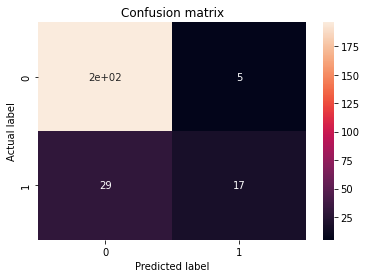

In [153]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,y_pred_gb3)
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

#### Classification metrics

Accuracy is defined as the is the ratio of the total number of correct predictions and the total number of predictions. Higher values of accuracy, is a requirement.

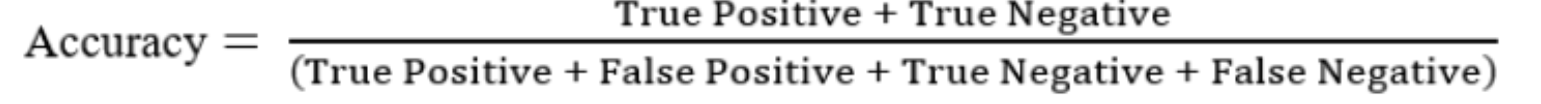


Precision is the ratio between the True Positives and all the Positives. Precision can be seen as a measure of quality. Precision also gives us a measure of the relevant data points. Higher precision values are desired.

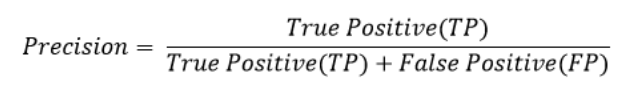



Recall is measure of our model correctly identifying True Positives. Recall also gives a measure of how accurately our model is able to identify the relevant data. Higher values are better.

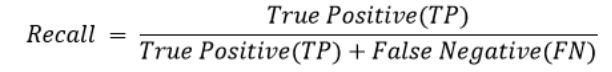

The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean.It is primarily used to compare the performance of two classifiers. It acts as a tradeoff between Precision and Recall. Higher the value, better it is.

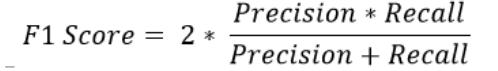








In [154]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,roc_curve, auc, roc_auc_score

gb3_acc = accuracy_score(y_test,y_pred_gb3)
print("Gradient Boosting-Accuracy:", gb3_acc)
gb3_rec = recall_score(y_test,y_pred_gb3)
print("Gradient Boosting-Recall score:",gb3_rec)
gb3_f1 = f1_score(y_test,y_pred_gb3)
print("Gradient Boosting-F1 score:",gb3_f1)
gb3_ps = precision_score(y_test,y_pred_gb3)
print("Gradient Boosting-Precision score:",gb3_ps)

Gradient Boosting-Accuracy: 0.8623481781376519
Gradient Boosting-Recall score: 0.3695652173913043
Gradient Boosting-F1 score: 0.4999999999999999
Gradient Boosting-Precision score: 0.7727272727272727


#### ROC-AUC Curve

This curve shows us the behavior of the classifier for every threshold by plotting two variables: the True Positive Rate (TPR) and the False Positive Rate (FPR).

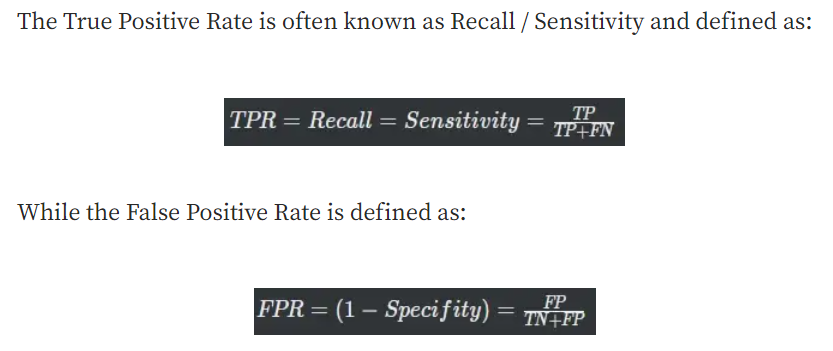

The intent of the ROC Curve is to show how well the model works for every possible threshold, as a relation of TPR vs FPR. So basically to plot the curve we need to calculate these variables for each threshold and plot it on a plane.

On the plots, the  red line represents where TPR = FPR, while the blue line represents the ROC curve of the classifier.If the ROC curve is exactly on the red line, it means that the classifier has the same predictive power as flipping a coin.

The AUROC Curve (Area Under ROC Curve) or simply ROC AUC Score, is a metric that allows us to compare different ROC Curves.

The red line is the lower limit, and the area under that line is 0.5, and the perfect ROC Curve would have an area of 1. As closer as our model’s ROC AUC is from 1, the better it is in separating classes and making better predictions.

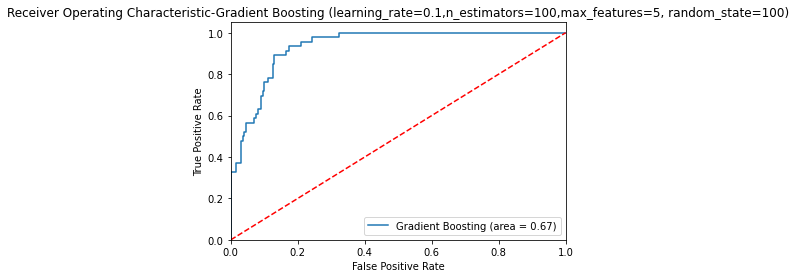

In [156]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

gb3_roc_auc = roc_auc_score(y_test, gb3.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gb3.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting (area = %0.2f)' % gb3_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-Gradient Boosting (learning_rate=0.1,n_estimators=100,max_features=5, random_state=100)')
plt.legend(loc="lower right")
plt.show()


If the blue line is relatively close to the red one, it means that the classifier is bad. The  model is a moderately good enough classifier, closer to what is possible to get from real-world data. The AUC is a moderately reasonable 0.67.

### Hyper parameter tuning

After building the model, the next challenge is how to fine-tune the hyperparameters of our model so that it works well with the dataset we have. It can be done quite easily using the GridSearchCV function in the sklearn module.

Cross validation is the base of this tuning methodology. The entire data is divided into k-folds (or k-parts, i.e. 10-fold means divide the dataset into 10 equal parts). Out of the k-folds, use 1 fold for testing and k-1 folds for training.

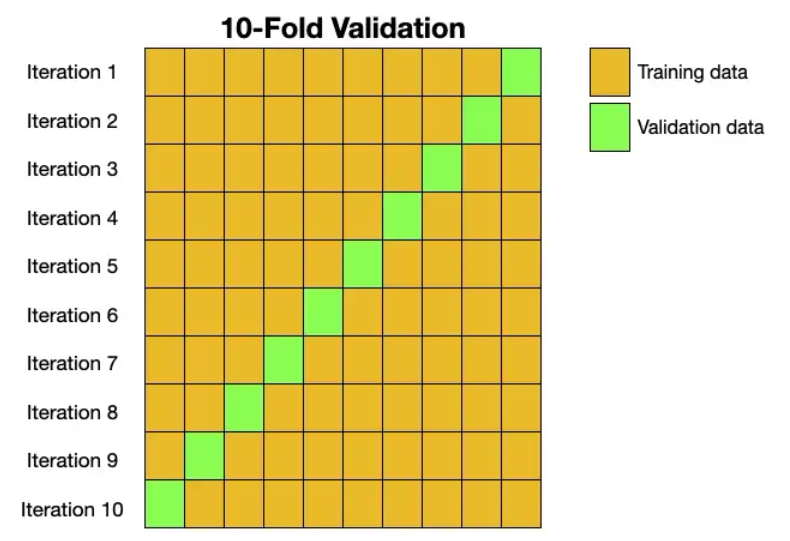

GridSearchCV is a function in sklearn’s model_selection package. It allows us to specify the different values for each hyperparameter and try out all the possible combinations when fitting our model. It does the training and testing using cross validation of our dataset — hence the acronym “CV” in GridSearchCV. The end result of GridSearchCV is a set of hyperparameters that best fit our data according to the scoring metric that we want our model to optimize on.

In [157]:
#grid search CV
from sklearn.model_selection import GridSearchCV

#dictionary containing all the various hyperparameters that you want to try when fitting your model
param_grid_gb ={'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),         
}
param_grid_gb

{'learning_rate': [0.01, 0.05, 0.1],
 'n_estimators': array([100, 200, 300, 400])}

In [158]:
#call the GridSearchCV() function using the algorithm that we are using, together with the various arguments
gs_gb = GridSearchCV(estimator=gb3,#estimator object
                  param_grid=param_grid_gb,
                  cv=10, #integer, to specify the number of folds in a `(Stratified)KFold`
                  scoring = 'accuracy', #evaluation metrics
                  verbose=0, #Controls the verbosity: the higher, the more messages
                  error_score='raise',
                  return_train_score=True #If False, the cv_results_ attribute will not include training scores
                 )
gs_gb

GridSearchCV(cv=10, error_score='raise',
             estimator=GradientBoostingClassifier(max_features=5,
                                                  random_state=100),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': array([100, 200, 300, 400])},
             return_train_score=True, scoring='accuracy')

In [159]:
#train the model
gs_gb.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=10, error_score='raise',
             estimator=GradientBoostingClassifier(max_features=5,
                                                  random_state=100),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': array([100, 200, 300, 400])},
             return_train_score=True, scoring='accuracy')

In [160]:
#create a dataframe with the Cross-validation results
df = pd.DataFrame(gs_gb.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.196466,0.014337,0.004140,0.006333,0.01,100,"{'learning_rate': 0.01, 'n_estimators': 100}",0.854167,0.854167,0.854167,...,0.852668,0.852668,0.852668,0.853828,0.852668,0.853828,0.852839,0.852839,0.852934,0.000452
1,0.400248,0.016910,0.006526,0.008029,0.01,200,"{'learning_rate': 0.01, 'n_estimators': 200}",0.843750,0.843750,0.854167,...,0.883991,0.885151,0.885151,0.879350,0.882831,0.879350,0.879490,0.881808,0.882162,0.002254
2,0.625150,0.030398,0.005607,0.006883,0.01,300,"{'learning_rate': 0.01, 'n_estimators': 300}",0.843750,0.843750,0.854167,...,0.897912,0.889791,0.895592,0.902552,0.892111,0.892111,0.888760,0.896871,0.894920,0.003977
3,0.744945,0.145366,0.001837,0.004667,0.01,400,"{'learning_rate': 0.01, 'n_estimators': 400}",0.843750,0.843750,0.843750,...,0.904872,0.904872,0.901392,0.903712,0.910673,0.906032,0.904983,0.914253,0.906517,0.003505
4,0.202983,0.004427,0.004691,0.007165,0.05,100,"{'learning_rate': 0.05, 'n_estimators': 100}",0.854167,0.843750,0.864583,...,0.910673,0.915313,0.914153,0.914153,0.911833,0.914153,0.913094,0.916570,0.913941,0.002838


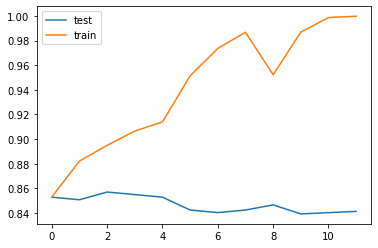

In [161]:
#plot the mean_test_score vs mean_train_score
import  matplotlib.pyplot as plt
test_scores = gs_gb.cv_results_['mean_test_score']
#print(test_scores)
train_scores = gs_gb.cv_results_['mean_train_score'] 
#print(train_scores)

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [162]:
#mean cross-validated score of the best_estimator
gs_gb.best_score_ 

0.8570065789473684

In [163]:
#parameter setting that gave the best results on the hold out data.
gs_gb.best_params_

{'learning_rate': 0.01, 'n_estimators': 300}

In [164]:
gs_gb.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, max_features=5, n_estimators=300,
                           random_state=100)

### Conclusion

Since the performance of tuned model(85.7%) is less than or almost same as the base model(86.2%), we cant say if Gradient boosting is the best model for our data.